<h2 align="center">Multiple Linear Regression</h2>

This assignmenet was done as part of the Coursera Guided Project [Link](https://www.coursera.org/projects/scikit-learn-multiple-linear-regression)

Linear Regression is a useful tool for predicting a quantitative response.

We have an input vector $X^T = (X_1, X_2,...,X_p)$, and want to predict a real-valued output $Y$. The linear regression model has the form

<h4 align="center"> $f(x) = \beta_0 + \sum_{j=1}^p X_j \beta_j$. </h4>

The linear model either assumes that the regression function $E(Y|X)$ is linear, or that the linear model is a reasonable approximation.Here the $\beta_j$'s are unknown parameters or coefficients, and the variables $X_j$ can come from different sources. No matter the source of $X_j$, the model is linear in the parameters.

**Simple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X + \epsilon$$</h5>

**Multiple Linear Regression**: <h5 align=center>$$Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 +...+ \beta_p X_p + \epsilon$$ </h5>
<h5 align=center> $$sales = \beta_0 + \beta_1 \times TV + \beta_2 \times radio + \beta_3 \times newspaper + \epsilon$$ </h5>

### 1. Importing Libraries and reading data

In [1]:
#####################################################################
# Importing Libraries
#####################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import skew

# model prep
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# models
from sklearn.linear_model import LinearRegression

# model metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

In [2]:
#####################################################################
# Load the data & explore
#####################################################################

adv = pd.read_csv('data/Advertising.csv')
print('Data Shape :',adv.shape)
print(adv.columns)
adv.head()

Data Shape : (200, 4)
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# check for unique values and null data
for c in adv.columns:
    print('**************************************************')
    print('Column Name - ', c)
    print('Column type - ', adv[c].dtype)
    print('Null values -', adv[c].isnull().sum())
    print('Number of Unique values - ', len(adv[c].unique()))

**************************************************
Column Name -  TV
Column type -  float64
Null values - 0
Number of Unique values -  190
**************************************************
Column Name -  radio
Column type -  float64
Null values - 0
Number of Unique values -  167
**************************************************
Column Name -  newspaper
Column type -  float64
Null values - 0
Number of Unique values -  172
**************************************************
Column Name -  sales
Column type -  float64
Null values - 0
Number of Unique values -  121


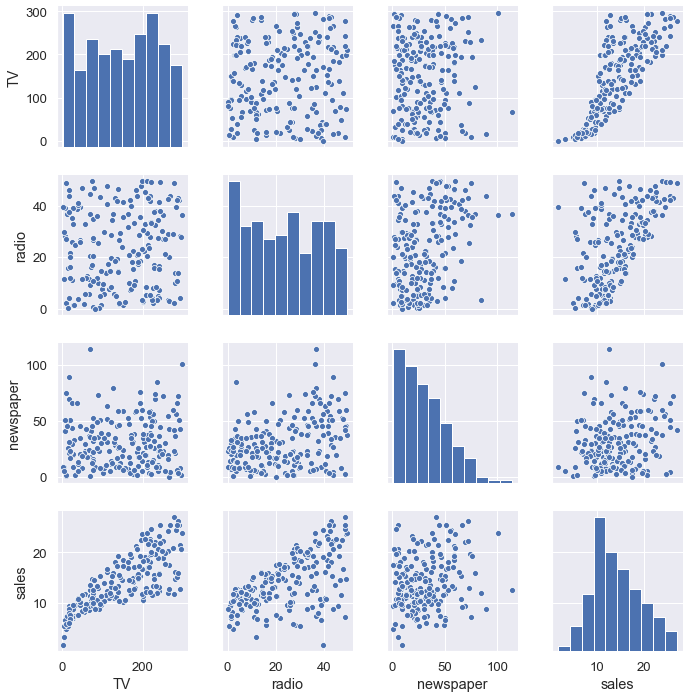

In [4]:
# plot the pair wise relation between features
sns.set(style='darkgrid', font_scale=1.2)
sns.pairplot(data=adv)

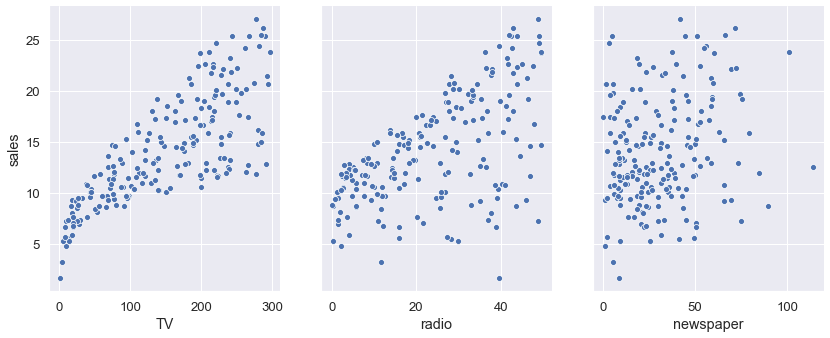

In [6]:
# plot the relation between features and predicted variable - sales
sns.set(style='darkgrid', font_scale=1.2)
sns.pairplot(data=adv, x_vars=['TV', 'radio', 'newspaper'], y_vars=['sales'], height=5, aspect=0.8)

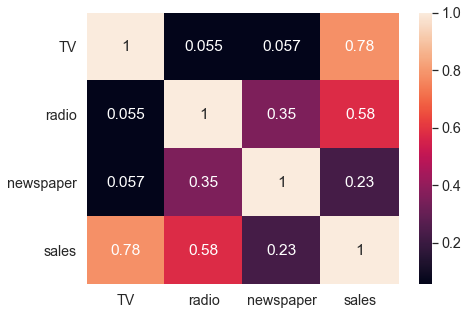

In [7]:
# get the correlation matrix for the features
sns.set(style='darkgrid', font_scale=1.3)
fig = plt.subplots(figsize=(7,5))

sns.heatmap(adv.corr(), annot=True)

### 2. Training the model & comparing results

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>



Model 1
******************************************************
Rows in x : 200
Rows in train : 160
Rows in test : 40
Intercept : 2.849668297345799
Coefficients: [('TV', 0.04560079444883113), ('radio', 0.18927340514773627), ('newspaper', 0.0023754450620018957)]
Root mean squared erro: 1.7
Mean squared error: 2.9
Mean absolute error : 1.2
R2 : 0.907


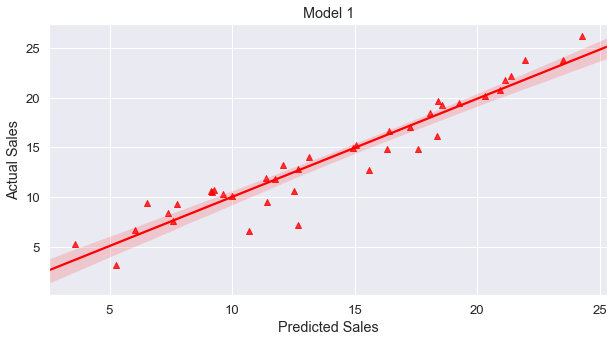



Model 2
******************************************************
Rows in x : 200
Rows in train : 160
Rows in test : 40
Intercept : 2.9003800342090607
Coefficients: [('TV', 0.04557001842371136), ('radio', 0.1903974482901756)]
Root mean squared erro: 1.7
Mean squared error: 2.9
Mean absolute error : 1.2
R2 : 0.908


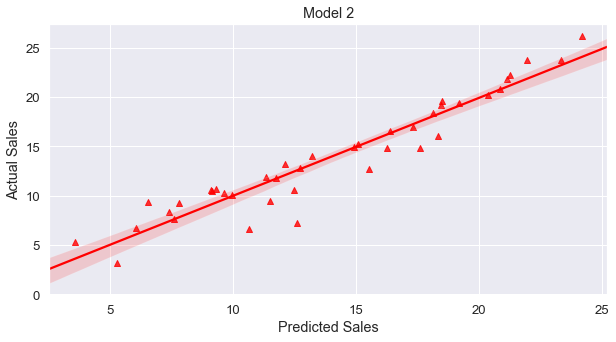



Model 3
******************************************************
Rows in x : 200
Rows in train : 160
Rows in test : 40
Intercept : 6.79328233890294
Coefficients: [('TV', 0.01820742775431361), ('radio', 0.022580276121828866), ('newspaper', 0.005994992269143611), ('TV_radio_int', 0.0011147793184661354)]
Root mean squared erro: 1.1
Mean squared error: 1.1
Mean absolute error : 0.8
R2 : 0.964


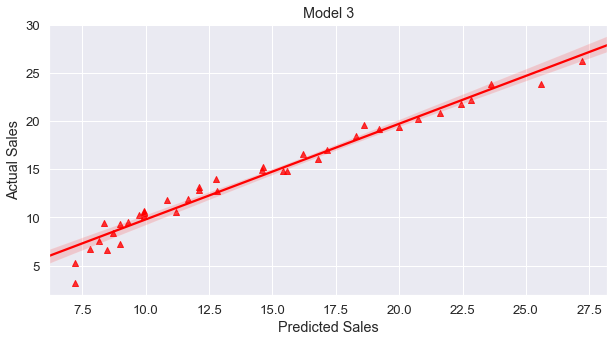

In [13]:
#####################################################################
# train the models & compare
#####################################################################

### We will train 3 different models and compare their performance
# model 1 : based on just the 3 given features
# model 2 : based on only 2 of the variables
# model 3. : adding one interaction effect variable

adv['TV_radio_int'] = adv['TV'] * adv['radio']

# function to fit the model for a given data

def fit_model(x, y, feat, name):
    
    # split 80-20 training vs test data
    x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, random_state=1234)

    print('Rows in x :', len(x))
    print('Rows in train :', len(x_train))
    print('Rows in test :', len(x_test))

    # fit the model
    lm = LinearRegression()
    lm.fit(x_train, y_train)

    print('Intercept :', lm.intercept_)
    print('Coefficients:', list(zip(feat, lm.coef_)))

    # check the performance on the test data
    model_pred = lm.predict(x_test)

    rmse = np.round(np.sqrt(mean_squared_error(y_test, model_pred)),1)
    mse = np.round(mean_squared_error(y_test, model_pred),1)
    mae = np.round(mean_absolute_error(y_test, model_pred),1)
    r2 = np.round(r2_score(y_test, model_pred),3)

    print('Root mean squared erro:', rmse)
    print('Mean squared error:', mse)
    print('Mean absolute error :', mae)
    print('R2 :', r2)
    
    # plot the regression plot of the model
    sns.set(style='darkgrid', font_scale=1.2)
    fig,ax = plt.subplots(figsize=(10,5))
    ax1 = sns.regplot(model_pred, y_test, color = 'red', marker = "^")
    ax1.set(title = name, xlabel = "Predicted Sales", ylabel = "Actual Sales")
    plt.show()
    

# model 1
x1 = adv[['TV', 'radio', 'newspaper']].copy()
y1 = adv['sales'].copy()
print('\n')
print('Model 1')
print('******************************************************')
fit_model(x1, y1, ['TV', 'radio', 'newspaper'], 'Model 1')

# model 2
x2 = adv[['TV', 'radio']].copy()
y2 = adv['sales'].copy()
print('\n')
print('Model 2')
print('******************************************************')
fit_model(x2, y2, ['TV', 'radio'], 'Model 2')

# model 3
x3 = adv[['TV', 'radio', 'newspaper', 'TV_radio_int']].copy()
y3 = adv['sales'].copy()
print('\n')
print('Model 3')
print('******************************************************')
fit_model(x3, y3, ['TV', 'radio', 'newspaper', 'TV_radio_int'], 'Model 3')